In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
import os
import math

plt.rc('font', size=10)
plt.rc('axes', titlesize=10)
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.rc('legend', title_fontsize=10)
plt.rc('figure', titlesize=10)

plt.rc('legend', framealpha=0.0)
plt.rc('lines', linewidth=1.5)

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{lmodern}'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

matplotlib.rcParams['figure.figsize'] = (textwidth := 6.5, 5)

def get_logs(job):
    with open(os.path.join(str(job), 'args.pickle'), "rb") as file:
        args = pickle.load(file)
    with open(os.path.join(str(job), 'results.pickle'), "rb") as file:
        results = pickle.load(file)
    return args, results

colormap = plt.cm.plasma

{'cpu': False, 'log_dir': 'logs/first-go/32/0.015625', 'log_interval': 100, 'seed': 0, 'batch_size': 128, 'train_steps': 10000, 'test_steps': 100, 'dataset': 'cifar10', 'arch': 'resmlp', 'depth': 6, 'blockdepth': 2, 'width': 32, 'loss': 'xent', 'lr': 0.015625, 'beta': 0.9, 'wd': 0.01}


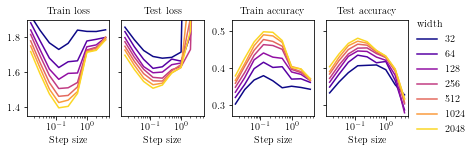

In [116]:
width_list = [32, 64, 128, 256, 512, 1024, 2048]
lr_list = [0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
colors = [colormap(i) for i in np.linspace(0.0, 0.92, len(width_list))]

fig, axes = plt.subplots(1, 4, sharex=True, constrained_layout=True)
fig.set_figheight(2)

keys = ['train_loss', 'test_loss', 'train_acc', 'test_acc']
titles = ['Train loss', 'Test loss', 'Train accuracy', 'Test accuracy']

print_args = True

for key_idx, (key, title) in enumerate(zip(keys,titles)):
    for color, width in zip(colors, width_list):
        curve = []
        for lr in lr_list:
            args, results = get_logs(f"../logs/first-go/{width}/{lr}")
            if print_args: print(args); print_args = False
            result = np.mean(results[key][-100:])
            curve.append(result)
        axes[key_idx].plot(lr_list, curve, color=color, label=width)
        axes[key_idx].set_title(title)
        axes[key_idx].set_xlabel("Step size")
        if 'loss' in key: axes[key_idx].set_ylim(1.35,1.9)
        if 'acc' in key: axes[key_idx].set_ylim(0.27, 0.53)

axes[1].set_yticklabels([])
axes[3].set_yticklabels([])

plt.legend(title="width", bbox_to_anchor=(1.0, 1.1))._legend_box.align = "left"

plt.xscale('log')
fig.savefig("tiny-mlp.pdf")
plt.show()